In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, InputLayer

IDEA: move images up and down an create new labels for half numbers?

In [3]:
#load data
data = pd.read_csv('data/TMNIST_Data.csv', header=0)
data

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = {'names', 'labels'}, axis=1)
X = X.values.reshape(-1,28,28,1) / 255.0 #normalize and reshape to square
X = 1 - X # invert colors -> black background

y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23920, 28, 28, 1)
(23920,)
(5980, 28, 28, 1)
(5980,)


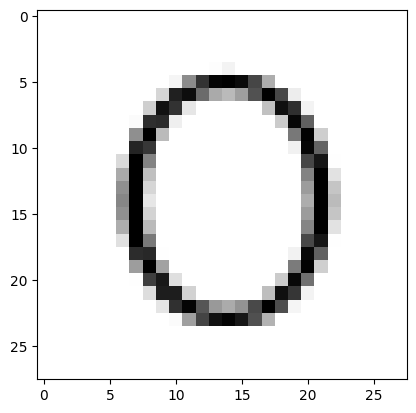

In [5]:
sample_image = X_train[1]

# Plot the image
plt.imshow(sample_image, cmap='gray')
plt.show()

In [6]:
batch_size = 128
num_classes = 10
epochs = 6
learning_rate = 0.001

In [7]:
#create model
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())  # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [8]:
#compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#train model
model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/6
187/187 [==============================] - 14s 70ms/step - loss: 0.3752 - accuracy: 0.8915 - val_loss: 0.1027 - val_accuracy: 0.9714
Epoch 2/6
187/187 [==============================] - 13s 72ms/step - loss: 0.0863 - accuracy: 0.9748 - val_loss: 0.0646 - val_accuracy: 0.9824
Epoch 3/6
187/187 [==============================] - 14s 73ms/step - loss: 0.0563 - accuracy: 0.9831 - val_loss: 0.0464 - val_accuracy: 0.9868
Epoch 4/6
187/187 [==============================] - 13s 72ms/step - loss: 0.0446 - accuracy: 0.9854 - val_loss: 0.0459 - val_accuracy: 0.9873
Epoch 5/6
187/187 [==============================] - 12s 65ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0444 - val_accuracy: 0.9871
Epoch 6/6
187/187 [==============================] - 12s 65ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0392 - val_accuracy: 0.9906


In [ ]:
#evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)


In [ ]:
#predict model
predictions = model.predict(X_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

In [ ]:
#save model
model.save('models/TMNIST_model.h5')